# Convolutions

Showing off the use of convolution by example of the MNIST data set.

## Imports

In [1]:
# -*- coding: utf-8 -*-
from __future__ import division
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

Using gpu device 0: GeForce GT 630M


In [2]:
from netz.layers import InputLayer, DenseLayer, OutputLayer, Conv2DLayer, Conv2DCCLayer, MaxPool2DLayer, DropoutLayer
from netz.neuralnet import NeuralNet
from netz.costfunctions import mse, crossentropy
from netz.nonlinearities import rectify
from netz.updaters import Momentum, Nesterov, SGD
from netz.visualize import plot_loss, plot_conv_weights, plot_conv_activity

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data

Make sure you have the MNIST data set ready. You can get it here: http://www.kaggle.com/c/digit-recognizer/data.

### Load data

In [4]:
df = pd.read_csv('/media/vinh/Volume/work/kaggle/mnist/train.csv', nrows=4000)

In [5]:
y = df.values[:, 0].astype(np.int32)
X = df.values[:, 1:].astype(np.float32) / 255

In [6]:
X = (X - X.mean()) / X.std()

In [7]:
X2D = X.reshape(-1, 1, 28, 28)

### Plot data

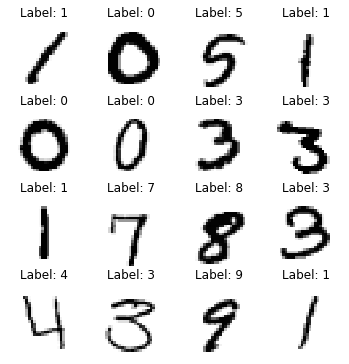

In [8]:
figs, axes = plt.subplots(4, 4, figsize=(6, 6))
for i in range(4):
    for j in range(4):
        axes[i, j].imshow(-X2D[i + 4 * j][0], cmap='gray', interpolation='nearest')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_title("Label: {}".format(y[i + 4 * j]))
        axes[i, j].axis('off')

## Neural nets

### Including pooling layer and using rectified linear units instead of sigmoid

In [9]:
layers1 = [InputLayer(),
           Conv2DCCLayer(16, (7, 7), nonlinearity=rectify, lambda2=0.01),
           MaxPool2DLayer(ds=(2, 2)),
           Conv2DCCLayer(32, (5, 5), nonlinearity=rectify, lambda2=0.001),
           MaxPool2DLayer(),
           Conv2DCCLayer(32, (3, 3), nonlinearity=rectify, lambda2=0.001),
           DropoutLayer(p=0.5),
           DenseLayer(100, nonlinearity=rectify),
           DenseLayer(50, nonlinearity=rectify),
           OutputLayer()]

In [10]:
net1 = NeuralNet(layers1, cost_function=crossentropy, updater=Nesterov(), verbose=1, eval_size=0.1)

In [11]:
net1.fit(X2D.astype(np.float32), y.astype(np.int32), max_iter=1)

ERROR (theano.gof.opt): Optimization failure due to: local_gpu_softmax_with_bias
ERROR:theano.gof.opt:Optimization failure due to: local_gpu_softmax_with_bias
ERROR (theano.gof.opt): TRACEBACK:
ERROR:theano.gof.opt:TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/vinh/anaconda/envs/netz/lib/python2.7/site-packages/Theano-0.7.0rc1-py2.7.egg/theano/gof/opt.py", line 1493, in process_node
    replacements = lopt.transform(node)
  File "/home/vinh/anaconda/envs/netz/lib/python2.7/site-packages/Theano-0.7.0rc1-py2.7.egg/theano/sandbox/cuda/opt.py", line 1136, in local_gpu_softmax_with_bias
    gpu_sm = GpuSoftmaxWithBias()(gpu_from_host(x), gpu_from_host(b))
  File "/home/vinh/anaconda/envs/netz/lib/python2.7/site-packages/Theano-0.7.0rc1-py2.7.egg/theano/gof/op.py", line 507, in __call__
    node = self.make_node(*inputs, **kwargs)
  File "/home/vinh/anaconda/envs/netz/lib/python2.7/site-packages/Theano-0.7.0rc1-py2.7.egg/theano/sandbox/cuda/basic_ops.py"

# ~=* Neural Network with 41340 learnable parameters *=~ 


## Layer information
  # | name         | output shape       |        total 
----|--------------|--------------------|--------------
  0 | input0       | (None, 1, 28, 28)  |          784
  1 | conv2dcc0    | (None, 16, 22, 22) |         7744
  2 | maxpool2d0   | (None, 16, 11, 11) |         1936
  3 | conv2dcc1    | (None, 32, 7, 7)   |         1568
  4 | maxpool2d1   | (None, 32, 4, 4)   |          512
  5 | conv2dcc2    | (None, 32, 2, 2)   |          128
  6 | dropout0     | (None, 32, 2, 2)   |          128
  7 | dense0       | (None, 100)        |          100
  8 | dense1       | (None, 50)         |           50
  9 | output0      | (None, 10)         |           10


## Training Information
 Epoch | Train loss | Valid loss | Train/Val | Valid acc | Dur
-------|------------|------------|-----------|-----------|------
     0 |   4.286927 |   2.893882 |    1.481  |  0.1811   | 1.7s


NeuralNet(cost_function=<function crossentropy at 0x7fb7c2fbcc80>,
     eval_size=0.1,
     iterator=<nolearn.lasagne.BatchIterator object at 0x7fb7c122f810>,
     lambda2=None,
     layers=[<netz.layers.InputLayer object at 0x7fb7c11e7310>, <netz.layers.Conv2DCCLayer object at 0x7fb7c11e73d0>, <netz.layers.MaxPool2DLayer object at 0x7fb7c11e7410>, <netz.layers.Conv2DCCLayer object at 0x7fb7c11e7450>, <netz.layers.MaxPool2DLayer object at 0x7fb7c11e7490>, <netz.layers.Conv2DCCLa...etz.layers.DenseLayer object at 0x7fb7c11e7590>, <netz.layers.OutputLayer object at 0x7fb7c11e75d0>],
     updater=<netz.updaters.Nesterov object at 0x7fb7c1252d10>, verbose=1)

In [12]:
net1.fit(X2D.astype(np.float32), y.astype(np.int32), max_iter=19)

## Training Information
 Epoch | Train loss | Valid loss | Train/Val | Valid acc | Dur
-------|------------|------------|-----------|-----------|------
     1 |   2.786265 |   2.638600 |    1.056  |  0.2556   | 1.7s
     2 |   2.543095 |   2.290386 |    1.110  |  0.4169   | 1.7s
     3 |   2.334447 |   1.921172 |    1.215  |  0.6104   | 1.6s
     4 |   2.113440 |   1.809859 |    1.168  |  0.6352   | 1.6s
     5 |   1.947865 |   1.570631 |    1.240  |  0.7221   | 1.7s
     6 |   1.851739 |   1.586573 |    1.167  |  0.6873   | 1.6s
     7 |   1.771053 |   1.475673 |    1.200  |  0.7295   | 1.6s
     8 |   1.676607 |   1.437281 |    1.167  |  0.6898   | 1.6s
     9 |   1.632868 |   1.251408 |    1.305  |  0.7692   | 1.6s
    10 |   1.550921 |   1.161960 |    1.335  |  0.7965   | 1.6s
    11 |   1.465557 |   1.042620 |    1.406  |  0.8437   | 1.6s
    12 |   1.383534 |   1.089420 |    1.270  |  0.8114   | 1.6s
    13 |   1.372840 |   1.018976 |    1.347  |  0.8561   | 1.6s
    14 |   1.272

NeuralNet(cost_function=<function crossentropy at 0x7fb7c2fbcc80>,
     eval_size=0.1,
     iterator=<nolearn.lasagne.BatchIterator object at 0x7fb7c122f810>,
     lambda2=None,
     layers=[<netz.layers.InputLayer object at 0x7fb7c11e7310>, <netz.layers.Conv2DCCLayer object at 0x7fb7c11e73d0>, <netz.layers.MaxPool2DLayer object at 0x7fb7c11e7410>, <netz.layers.Conv2DCCLayer object at 0x7fb7c11e7450>, <netz.layers.MaxPool2DLayer object at 0x7fb7c11e7490>, <netz.layers.Conv2DCCLa...etz.layers.DenseLayer object at 0x7fb7c11e7590>, <netz.layers.OutputLayer object at 0x7fb7c11e75d0>],
     updater=<netz.updaters.Nesterov object at 0x7fb7c1252d10>, verbose=1)

In [21]:
net1.fit(X2D.astype(np.float32), y.astype(np.int32), max_iter=30)

## Training Information
 Epoch | Train loss | Valid loss | Train/Val | Valid acc | Dur
-------|------------|------------|-----------|-----------|------
    20 |   1.045725 |   0.835371 |    1.252  |  0.8908   | 1.8s
    21 |   0.984955 |   0.777782 |    1.266  |  0.9132   | 1.7s
    22 |   0.979073 |   0.759826 |    1.289  |  0.9206   | 1.7s
    23 |   0.893937 |   0.735893 |    1.215  |  0.9156   | 1.7s
    24 |   0.865527 |   0.734439 |    1.178  |  0.9181   | 1.7s
    25 |   0.862785 |   0.796173 |    1.084  |  0.8933   | 1.7s
    26 |   0.812890 |   0.678708 |    1.198  |  0.9355   | 1.7s
    27 |   0.758856 |   0.695560 |    1.091  |  0.9330   | 1.7s
    28 |   0.761292 |   0.709863 |    1.072  |  0.9156   | 1.7s
    29 |   0.757062 |   0.630126 |    1.201  |  0.9380   | 1.7s
    30 |   0.747116 |   0.752663 |    0.993  |  0.8983   | 1.7s
    31 |   0.706192 |   0.606574 |    1.164  |  0.9404   | 1.7s
    32 |   0.692676 |   0.688711 |    1.006  |  0.9206   | 1.7s
    33 |   0.679

NeuralNet(cost_function=<function crossentropy at 0x7fb7c2fbcc80>,
     eval_size=0.1,
     iterator=<nolearn.lasagne.BatchIterator object at 0x7fb7c122f810>,
     lambda2=None,
     layers=[<netz.layers.InputLayer object at 0x7fb7c11e7310>, <netz.layers.Conv2DCCLayer object at 0x7fb7c11e73d0>, <netz.layers.MaxPool2DLayer object at 0x7fb7c11e7410>, <netz.layers.Conv2DCCLayer object at 0x7fb7c11e7450>, <netz.layers.MaxPool2DLayer object at 0x7fb7c11e7490>, <netz.layers.Conv2DCCLa...etz.layers.DenseLayer object at 0x7fb7c11e7590>, <netz.layers.OutputLayer object at 0x7fb7c11e75d0>],
     updater=<netz.updaters.Nesterov object at 0x7fb7c1252d10>, verbose=1)

### Visualizations

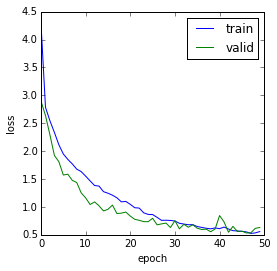

In [22]:
plot_loss(net1)

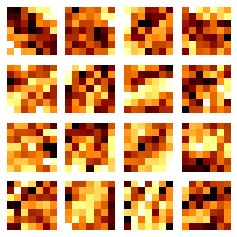

In [23]:
plot_conv_weights(net1.layers[1], figsize(4, 4))

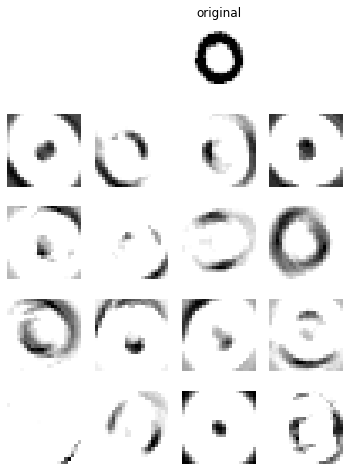

In [24]:
plot_conv_activity(net1.layers[1], X2D[1:2])

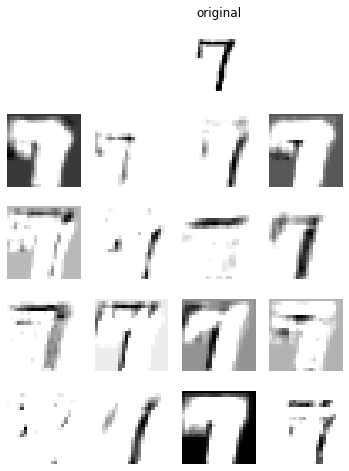

In [25]:
plot_conv_activity(net1.layers[1], X2D[6:7])

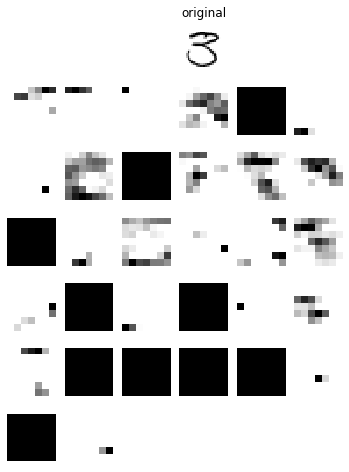

In [26]:
plot_conv_activity(net1.layers[3], X2D[7:8])

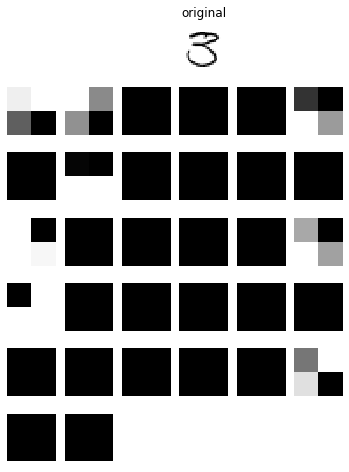

In [27]:
plot_conv_activity(net1.layers[5], X2D[7:8])

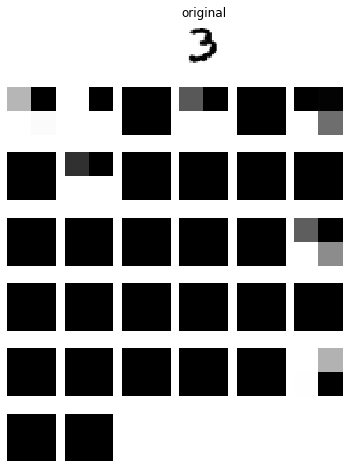

In [28]:
plot_conv_activity(net1.layers[5], X2D[9:10])

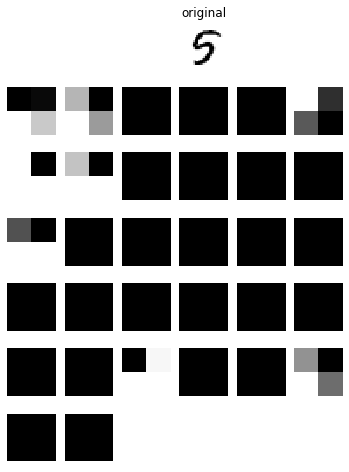

In [29]:
plot_conv_activity(net1.layers[5], X2D[8: 9])